ANALYZE, VISUALIZE AND PREPARE DATA

In [1]:
#Import necessarry libraries

import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read dataset
df = pd.read_csv("customer.csv", encoding='unicode_escape')

In [3]:
#Quick look dataset
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country;;;;;;
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom;;;;;;
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom;;;;;;
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom;;;;;;
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom;;;;;;
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom;;;;;;
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom;;;;;;
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 8:26,4.25,17850.0,United Kingdom;;;;;;
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom;;;;;;
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom;;;;;;
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/2010 8:34,1.69,13047.0,United Kingdom;;;;;;


In [4]:
# knowing its shape
df.shape

(541909, 8)

In [5]:
# getting its basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      541909 non-null  object 
 1   StockCode      535874 non-null  object 
 2   Description    534420 non-null  object 
 3   Quantity       535874 non-null  float64
 4   InvoiceDate    535874 non-null  object 
 5   UnitPrice      535874 non-null  float64
 6   CustomerID     403182 non-null  float64
 7   Country;;;;;;  535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,535874.0,9.587927,153.292222,-74215.00,1.00,3.00,10.00,74215.0
UnitPrice,535874.0,4.636533,97.302232,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,403182.0,15287.687868,1714.009551,12346.00,13952.00,15152.00,16791.00,18287.0


In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country;;;;;;'],
      dtype='object')

In [8]:
#Rename wrong column name
df.rename(columns ={'Country;;;;;;':'Country'},inplace=True)

In [9]:
#Fix wrong values
df['Country'] = df['Country'].str.replace(';', '')
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [10]:
#Fix wrong values
df['Description'] = df['Description'].str.replace('.', '')
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [11]:
# Look top 10 products that sold
df["StockCode"].value_counts().head()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
Name: count, dtype: int64

/var/folders/t3/v4nr3hg96mnglt3j6t387ytr0000gn/T/ipykernel_37492/3415202452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'StockCode', data= df, order= top10_product,  palette= "Set2")


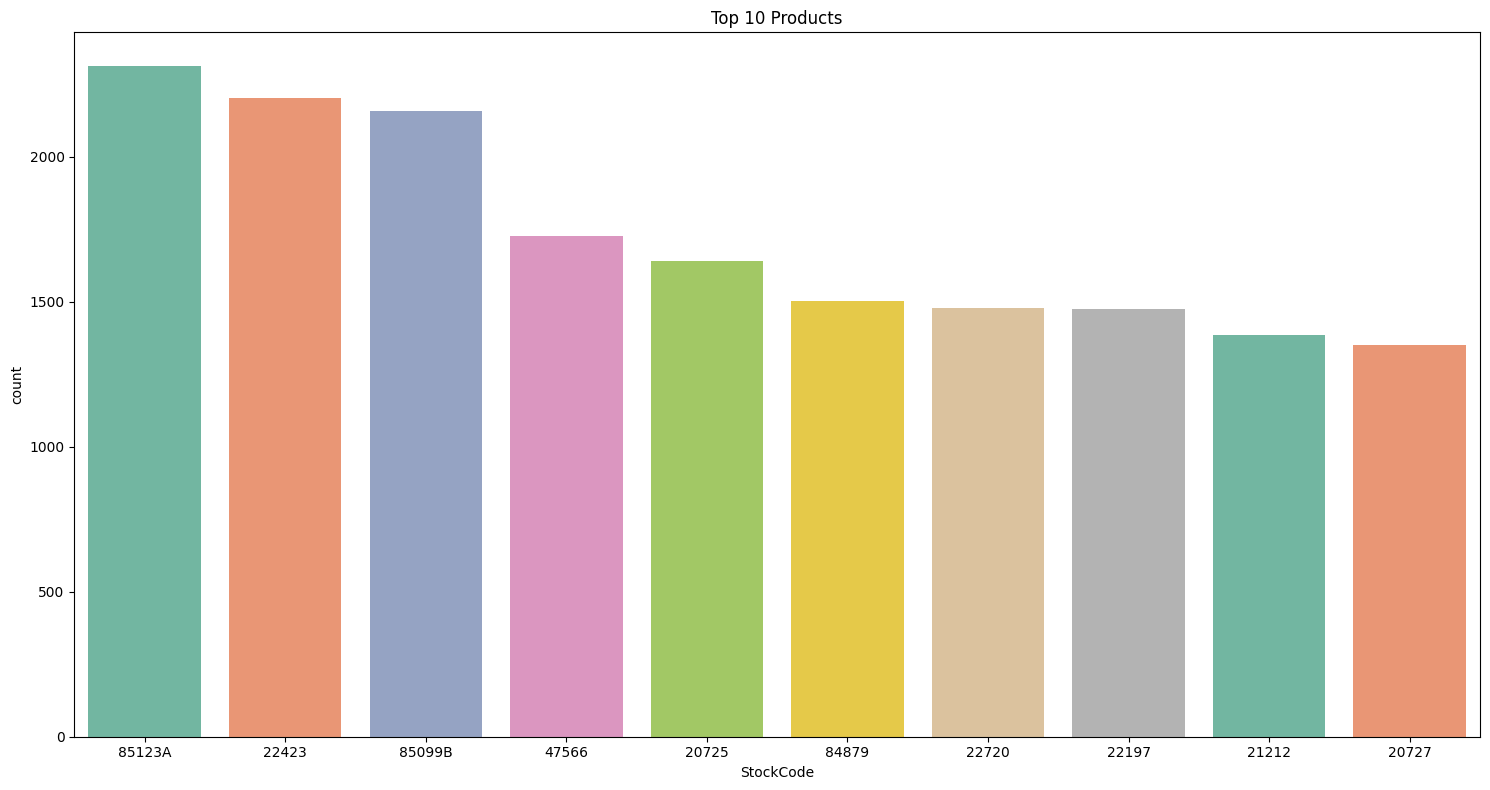

In [12]:
# visualizing top 10 products that sold using countplot
top10_product = df['StockCode'].value_counts().head(10).index.tolist()

plt.figure(figsize= (15, 8))
sns.countplot(x= 'StockCode', data= df, order= top10_product,  palette= "Set2")
plt.title('Top 10 Products')
plt.tight_layout()
plt.show()

In [13]:
# chceking for null values
df.isnull().sum()

InvoiceNo           0
StockCode        6035
Description      7489
Quantity         6035
InvoiceDate      6035
UnitPrice        6035
CustomerID     138727
Country          6035
dtype: int64

In [14]:
#Delete empties
df.dropna(inplace = True)

In [15]:
# chceking for null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
# checking for redundancy
df.duplicated().sum()

np.int64(5179)

In [17]:
# dropping redundancy
df.drop_duplicates(keep= 'first', inplace= True)

In [18]:
# checking for redundancy
df.duplicated().sum()

np.int64(0)

In [19]:
# getting its basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398003 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    398003 non-null  object 
 1   StockCode    398003 non-null  object 
 2   Description  398003 non-null  object 
 3   Quantity     398003 non-null  float64
 4   InvoiceDate  398003 non-null  object 
 5   UnitPrice    398003 non-null  float64
 6   CustomerID   398003 non-null  float64
 7   Country      398003 non-null  object 
dtypes: float64(3), object(5)
memory usage: 27.3+ MB


In [20]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df = df[~df["InvoiceNo"].str.contains("C", na=False)]

# Quantity is very low of number due to cancellation of invoice that includes letter of "C"

df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,389196.0,12.92558,1.0,2.0,6.0,12.0,74215.0,128.071315
InvoiceDate,389196,2011-07-10 23:53:29.084265984,2010-12-01 08:26:00,2011-04-07 12:00:00,2011-07-31 14:17:00,2011-10-20 13:07:00,2011-12-09 12:50:00,NaN
UnitPrice,389196.0,3.137815,0.0,1.25,1.95,3.75,8142.75,22.339928
CustomerID,389196.0,15287.782786,12346.0,13954.0,15152.0,16791.0,18287.0,1714.020387


In [21]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [22]:
# Change data type
#Categorical value
df['InvoiceNo'] = df['InvoiceNo'].astype(object)

df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [23]:
# Change data type
df['Quantity'] = df['Quantity'].astype(int)

df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [24]:
# Change data type
#categorical value
df['CustomerID'] = df['CustomerID'].astype(object)

df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

/var/folders/t3/v4nr3hg96mnglt3j6t387ytr0000gn/T/ipykernel_37492/2066492128.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'CustomerID', data= df, order= top10_customer,  palette= 'crest')


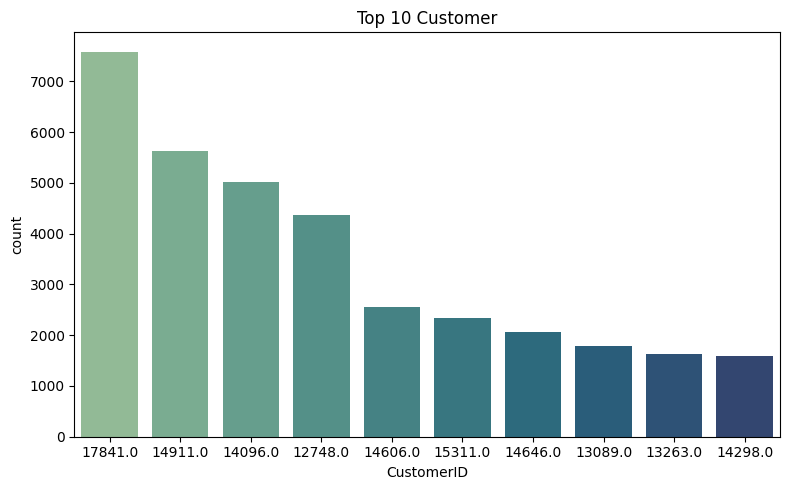

In [25]:
# visualizing top 10 frequent customer using countplot
top10_customer = df['CustomerID'].value_counts().head(10).index

plt.figure(figsize= (8,5))
sns.countplot(x= 'CustomerID', data= df, order= top10_customer,  palette= 'crest')
plt.title('Top 10 Customer')
plt.tight_layout()
plt.show()

In [26]:
#Check value counts
df.count()

InvoiceNo      389196
StockCode      389196
Description    389196
Quantity       389196
InvoiceDate    389196
UnitPrice      389196
CustomerID     389196
Country        389196
dtype: int64

In [27]:
#Check mathematical data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,389196.0,12.92558,1.0,2.0,6.0,12.0,74215.0,128.071315
InvoiceDate,389196,2011-07-10 23:53:29.084265984,2010-12-01 08:26:00,2011-04-07 12:00:00,2011-07-31 14:17:00,2011-10-20 13:07:00,2011-12-09 12:50:00,NaN
UnitPrice,389196.0,3.137815,0.0,1.25,1.95,3.75,8142.75,22.339928


In [28]:
#Create new colunm for costumer analysis
df["TotalPrice"]=df["Quantity"]*df["UnitPrice"]

In [29]:
#Total price by country
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending=False ).head()

,TotalPrice
Country,
United Kingdom,7072197.314
Netherlands,284023.860
EIRE,263656.760
Germany,227721.970
France,208600.960


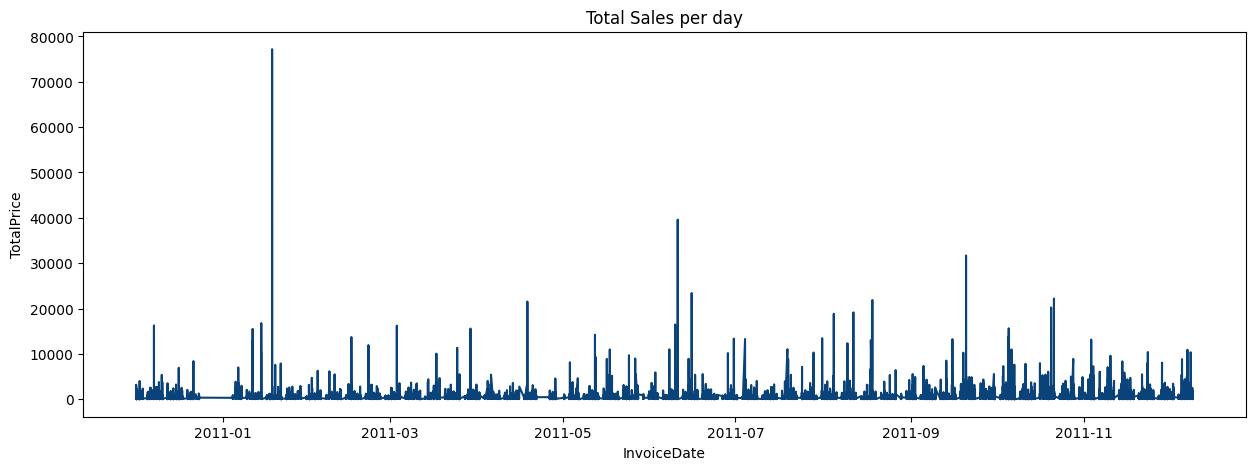

In [30]:
# visualizing total sales perday using lineplot
sales_perday = df.groupby('InvoiceDate')['TotalPrice'].sum().sort_values(ascending= False).to_frame().reset_index()

plt.figure(figsize= (15,5))
sns.lineplot(x= 'InvoiceDate', y= 'TotalPrice', data= sales_perday, color= '#0a437a')
plt.title('Total Sales per day')
plt.show()

<Axes: xlabel='Country'>

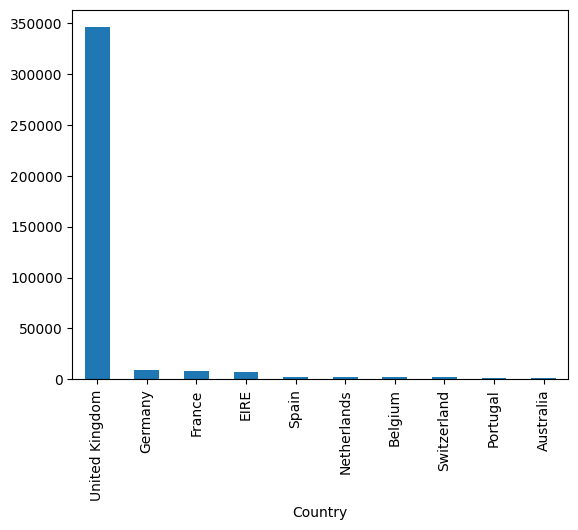

In [31]:
#Top ten country's customer
df.Country.value_counts()[:10].plot(kind='bar')

<Axes: xlabel='Country'>

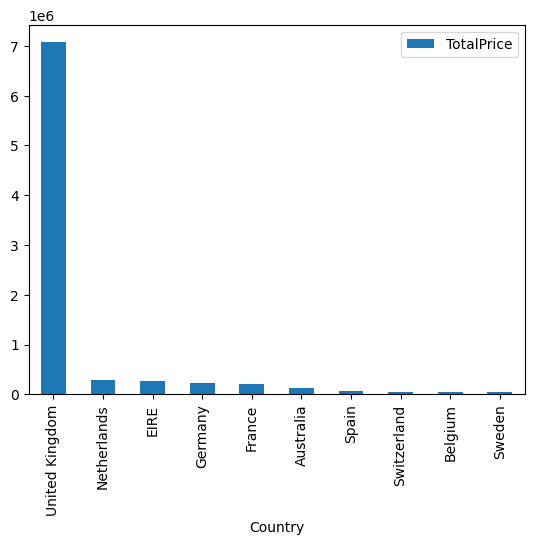

In [32]:
#Top ten country by total price
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending=False )[:10].plot(kind='bar')

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [34]:
#Check mathematical data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,389196.0,12.92558,1.0,2.0,6.0,12.0,74215.0,128.071315
InvoiceDate,389196,2011-07-10 23:53:29.084265984,2010-12-01 08:26:00,2011-04-07 12:00:00,2011-07-31 14:17:00,2011-10-20 13:07:00,2011-12-09 12:50:00,NaN
UnitPrice,389196.0,3.137815,0.0,1.25,1.95,3.75,8142.75,22.339928
TotalPrice,389196.0,22.264397,0.0,4.95,12.48,19.8,77183.6,157.27378


In [35]:
# Customer purchased products at last time

df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [36]:
# getting the latest invoice date in the dataset
latest_invoice_date = df['InvoiceDate'].max()
latest_invoice_date

Timestamp('2011-12-09 12:50:00')

In [37]:
# invoice date before three months of latest date
mon3_ret_date = pd.Timestamp('2011-09-01 12:50:00')
mon3_ret_date

Timestamp('2011-09-01 12:50:00')

In [38]:
# taking the first part of data that doesn't have last 3 months of transaction

df_part1 = df.copy() # creating copy
df_part1.set_index('InvoiceDate', inplace= True) # setting Date as index
df_part1 = df_part1.loc[:'2011-09-09 12:50:00'] # slicing the data

In [39]:
# reseting the index
df_part1.reset_index(inplace= True)

In [40]:
df_part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230782 entries, 0 to 230781
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  230782 non-null  datetime64[ns]
 1   InvoiceNo    230782 non-null  object        
 2   StockCode    230782 non-null  object        
 3   Description  230782 non-null  object        
 4   Quantity     230782 non-null  int64         
 5   UnitPrice    230782 non-null  float64       
 6   CustomerID   230782 non-null  object        
 7   Country      230782 non-null  object        
 8   TotalPrice   230782 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 15.8+ MB


In [41]:
df_part1.head()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,3.39,17850.0,United Kingdom,20.34


RFM ANALYSIS

In [42]:
# calculating the recency of each customer

recency = df_part1.groupby('CustomerID').agg({'InvoiceDate': lambda x : 
                                              (latest_invoice_date - x.max()).days}).reset_index() # calculating recency

recency.rename(columns= {'InvoiceDate':'Recency'}, inplace= True) # renaming columns
recency

,CustomerID,Recency
0,12346.0,325
1,12347.0,129
2,12348.0,248
3,12350.0,309
4,12352.0,261
...,...,...
3358,18280.0,277
3359,18281.0,180
3360,18282.0,125
3361,18283.0,95


In [43]:
# calculating the frequency of each customer

frequency = df_part1.groupby('CustomerID').agg({'CustomerID':'count'}) # calculating frequency

frequency.rename(columns= {'CustomerID':'Frequency'}, inplace= True) # renaming columns
frequency.reset_index(inplace= True) # resetting index

frequency

,CustomerID,Frequency
0,12346.0,1
1,12347.0,123
2,12348.0,28
3,12350.0,17
4,12352.0,38
...,...,...
3358,18280.0,10
3359,18281.0,7
3360,18282.0,7
3361,18283.0,424


In [44]:
# calculating the monetary of each customer

monetary = df_part1.groupby('CustomerID').agg({'TotalPrice':'sum'}).reset_index() # calculting monetary

monetary.rename(columns= {'TotalPrice':'Monetary'}, inplace= True) # renaming columns
monetary

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,2780.66
2,12348.0,1487.24
3,12350.0,334.40
4,12352.0,1561.81
...,...,...
3358,18280.0,180.60
3359,18281.0,80.82
3360,18282.0,100.21
3361,18283.0,1086.83


In [45]:
# creating a new dataframe RFM with recency, frequency and monetary of each customer
rfm = pd.concat([recency.iloc[:,:], frequency.iloc[:,-1], monetary.iloc[:,-1]], axis= 1)
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,129,123,2780.66
2,12348.0,248,28,1487.24
3,12350.0,309,17,334.40
4,12352.0,261,38,1561.81


In [46]:
# describing feature variables of RFM dataframe
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3363.000000,3363.000000,3363.000000,3363.000000
mean,15274.259292,184.986619,68.623848,1602.433016
std,1726.046615,79.806668,143.892024,6115.799794
min,12346.000000,91.000000,1.000000,2.900000
25%,13783.000000,116.000000,15.000000,261.775000
50%,15232.000000,164.000000,33.000000,561.710000
75%,16765.500000,241.000000,76.000000,1382.415000
max,18287.000000,373.000000,4353.000000,176937.020000


/var/folders/t3/v4nr3hg96mnglt3j6t387ytr0000gn/T/ipykernel_37492/872770885.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= rfm[feature], kde= True, ax= axis[i], color= '#7e4071', axlabel= feature)
/var/folders/t3/v4nr3hg96mnglt3j6t387ytr0000gn/T/ipykernel_37492/872770885.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

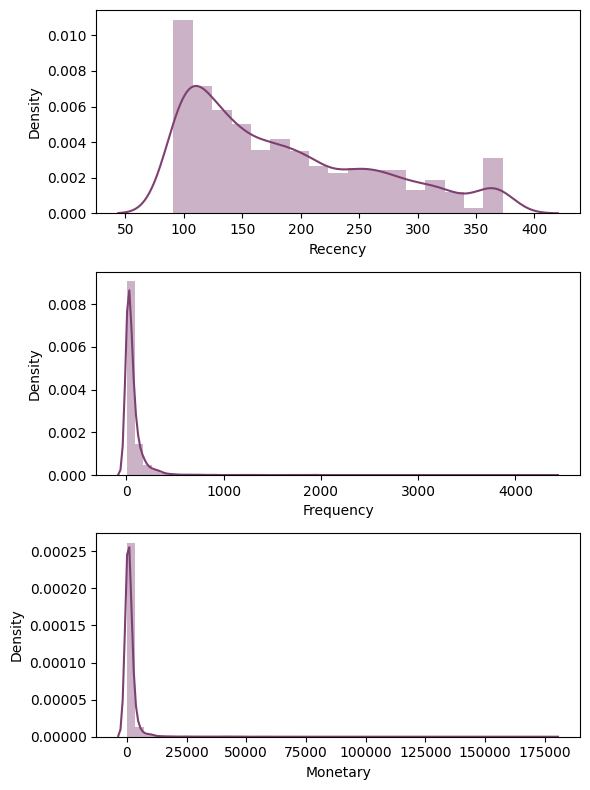

In [47]:
# visualizing the distribution of feature variables in RFM dataframe using distplot
fig, axis = plt.subplots(3,1, figsize= (6,8))

for i,feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.distplot(x= rfm[feature], kde= True, ax= axis[i], color= '#7e4071', axlabel= feature)

plt.tight_layout()
plt.show()

In [48]:
'''
# Recency values should be higher than 1, so today_date can be choosen maximum value +2

today_date = pd.datetime(2011, 12, 11)

rfm = df.groupby("CustomerID").agg({"InvoiceDate": lambda date: (today_date - date.max()).days,
                                     "InvoiceNo": lambda InvoiceNo: InvoiceNo.nunique(),
                                     "TotalPrice":lambda TotalPrice: TotalPrice.sum()})

rfm.columns = ["Recency", "Frequency", "Monetary"]

rfm = rfm[rfm["Monetary"] > 0]

rfm.describe().T
'''

'\n# Recency values should be higher than 1, so today_date can be choosen maximum value +2\n\ntoday_date = pd.datetime(2011, 12, 11)\n\nrfm = df.groupby("CustomerID").agg({"InvoiceDate": lambda date: (today_date - date.max()).days,\n                                     "InvoiceNo": lambda InvoiceNo: InvoiceNo.nunique(),\n                                     "TotalPrice":lambda TotalPrice: TotalPrice.sum()})\n\nrfm.columns = ["Recency", "Frequency", "Monetary"]\n\nrfm = rfm[rfm["Monetary"] > 0]\n\nrfm.describe().T\n'

/var/folders/t3/v4nr3hg96mnglt3j6t387ytr0000gn/T/ipykernel_37492/854713951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(rfm["Monetary"], palette="summer")


<Axes: ylabel='Monetary'>

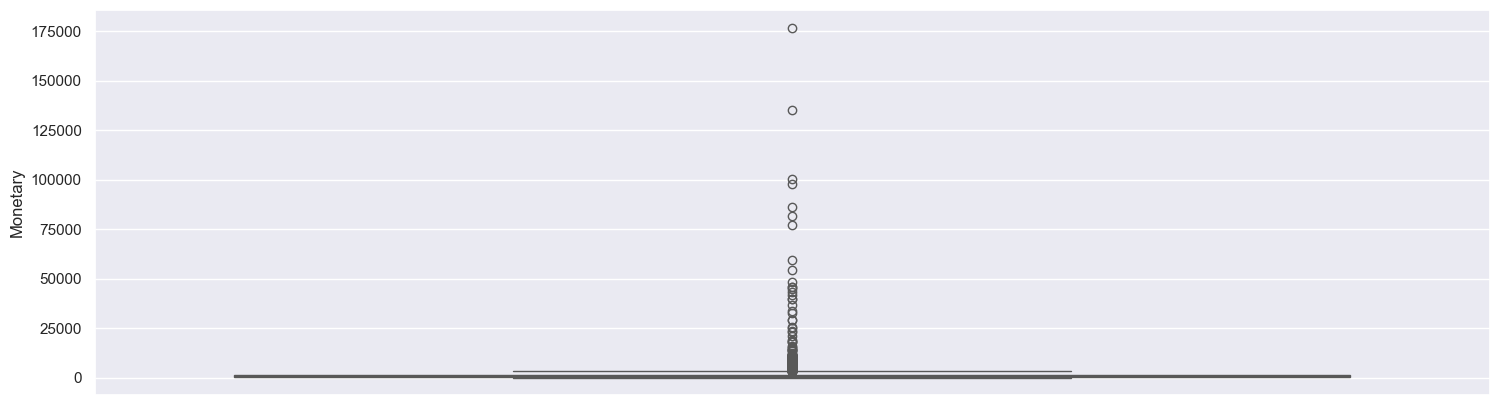

In [49]:
import seaborn as sns

sns.set(rc = {"figure.figsize" : (18,5)})

sns.boxplot(rfm["Monetary"], palette="summer")

/var/folders/t3/v4nr3hg96mnglt3j6t387ytr0000gn/T/ipykernel_37492/1720995615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(rfm["Frequency"], palette="summer")


<Axes: ylabel='Frequency'>

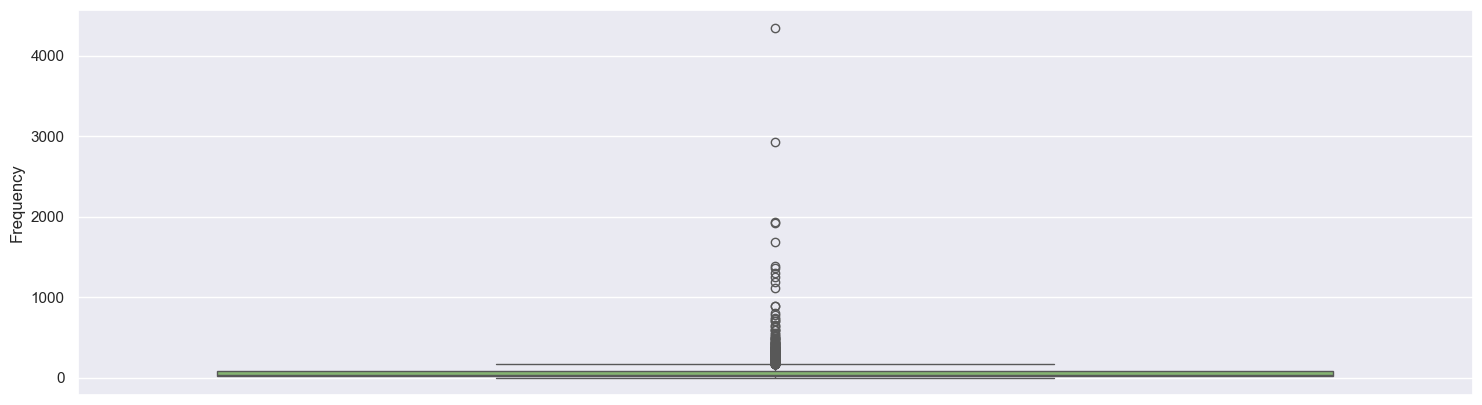

In [50]:
sns.set(rc = {"figure.figsize" : (18,5)})

sns.boxplot(rfm["Frequency"], palette="summer")

/var/folders/t3/v4nr3hg96mnglt3j6t387ytr0000gn/T/ipykernel_37492/3563012195.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(rfm["Recency"], palette="summer")


<Axes: ylabel='Recency'>

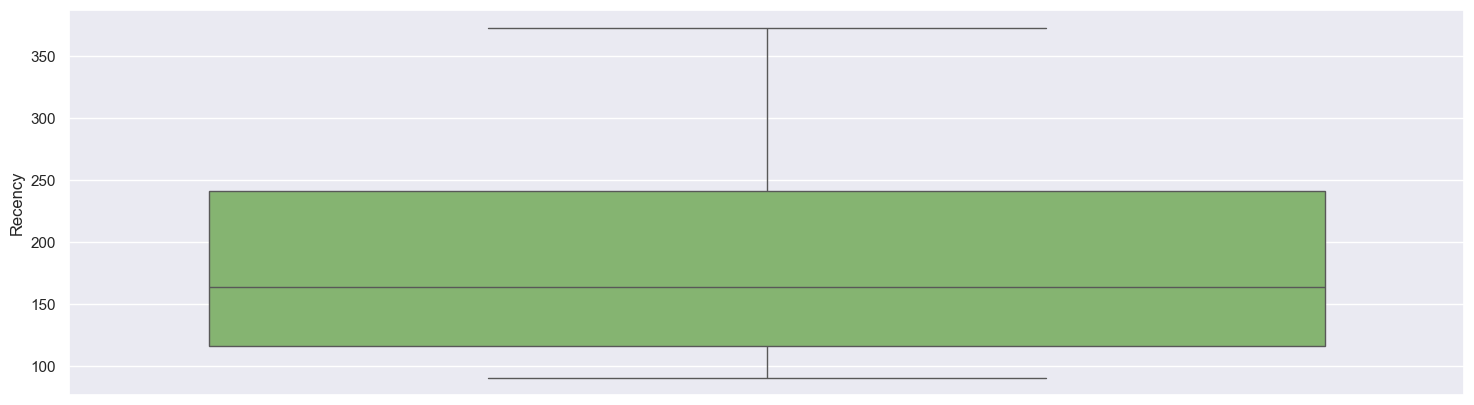

In [51]:
sns.set(rc = {"figure.figsize" : (18,5)})

sns.boxplot(rfm["Recency"], palette="summer")

In [52]:
#Frequency, recency, monetary are scaled to with 'qcut' function for assesting to these values.
rfm["Recency_score"] = pd.cut(rfm["Recency"], 5, labels=[5,4,3,2,1])

rfm["Monetary_score"] = pd.cut(rfm["Monetary"], 5, labels=[1,2,3,4,5])

rfm["Frequency_score"] = pd.cut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])

rfm["RFM_SCORE"] = (rfm["Recency_score"].astype(int) + rfm["Frequency_score"].astype(int) + rfm["Monetary_score"].astype(int))

rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,Recency_score,Monetary_score,Frequency_score,RFM_SCORE
0,12346.0,325,1,77183.60,1,3,1,5
1,12347.0,129,123,2780.66,5,1,5,11
2,12348.0,248,28,1487.24,3,1,3,7
3,12350.0,309,17,334.40,2,1,2,5
4,12352.0,261,38,1561.81,2,1,3,6
5,12353.0,203,4,89.00,4,1,1,6
6,12354.0,231,58,1079.40,3,1,4,8
7,12355.0,213,13,459.40,3,1,2,6
8,12356.0,245,57,2753.08,3,1,4,8
9,12358.0,150,12,484.86,4,1,1,6


In [53]:
rfm.dtypes

CustomerID          float64
Recency               int64
Frequency             int64
Monetary            float64
Recency_score      category
Monetary_score     category
Frequency_score    category
RFM_SCORE             int64
dtype: object

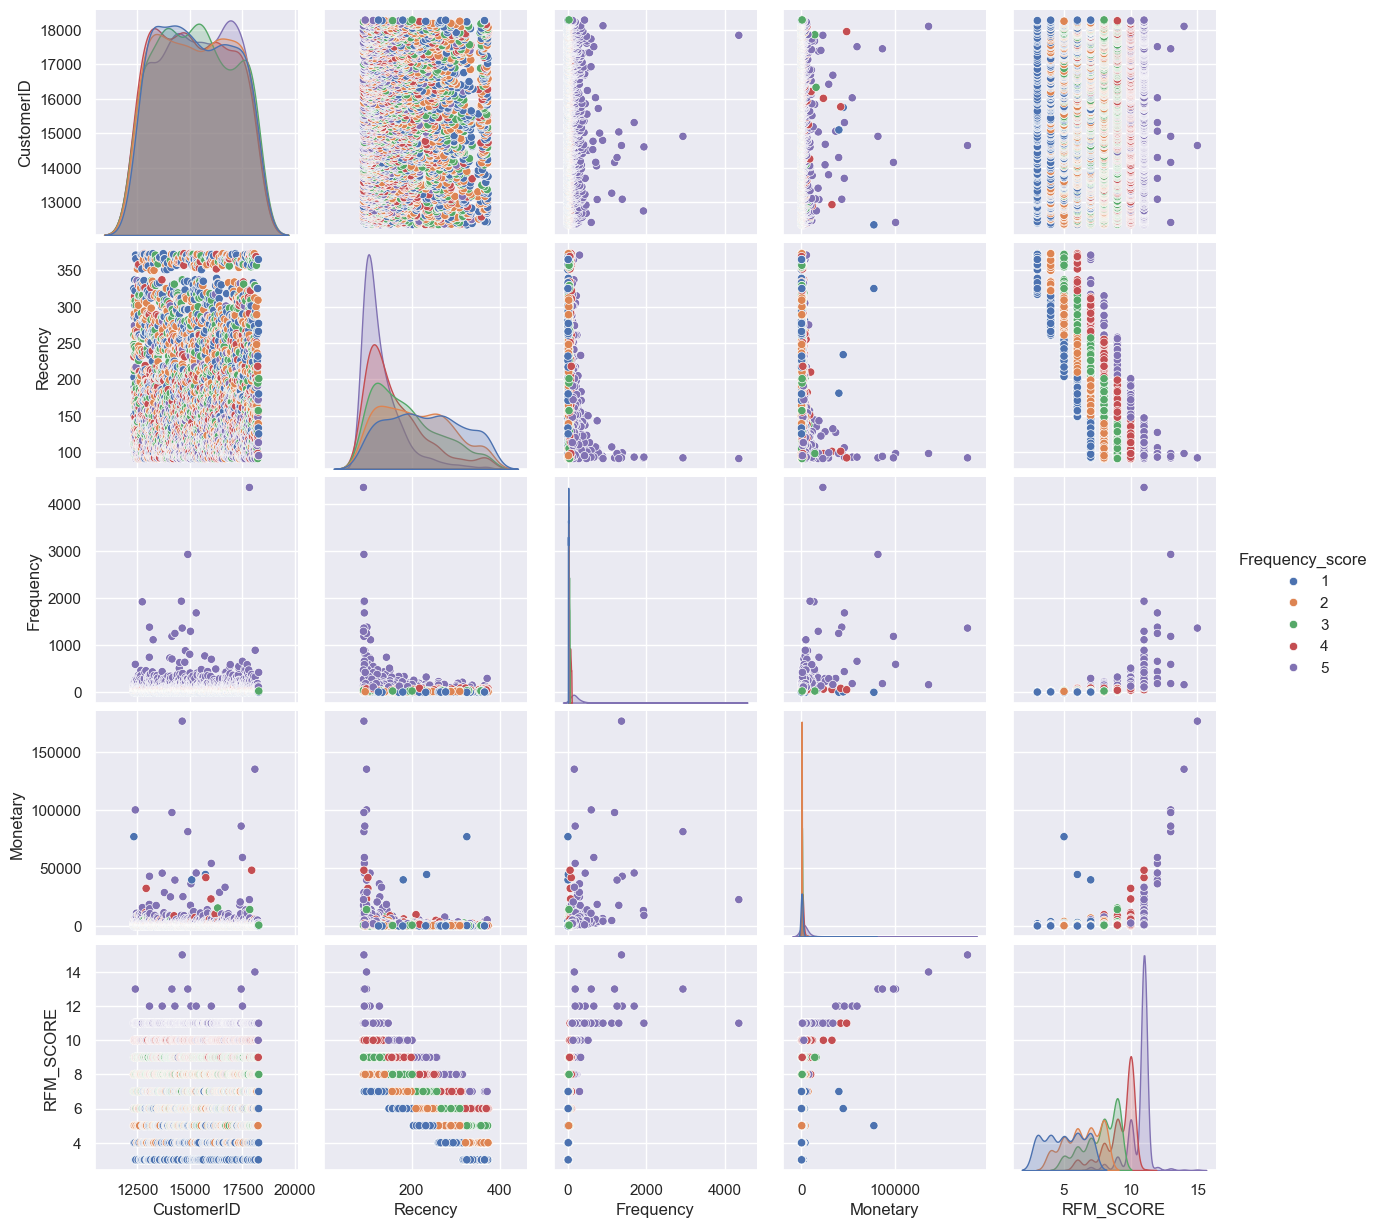

In [54]:
import seaborn as sns

sns.pairplot(rfm,hue="Frequency_score")

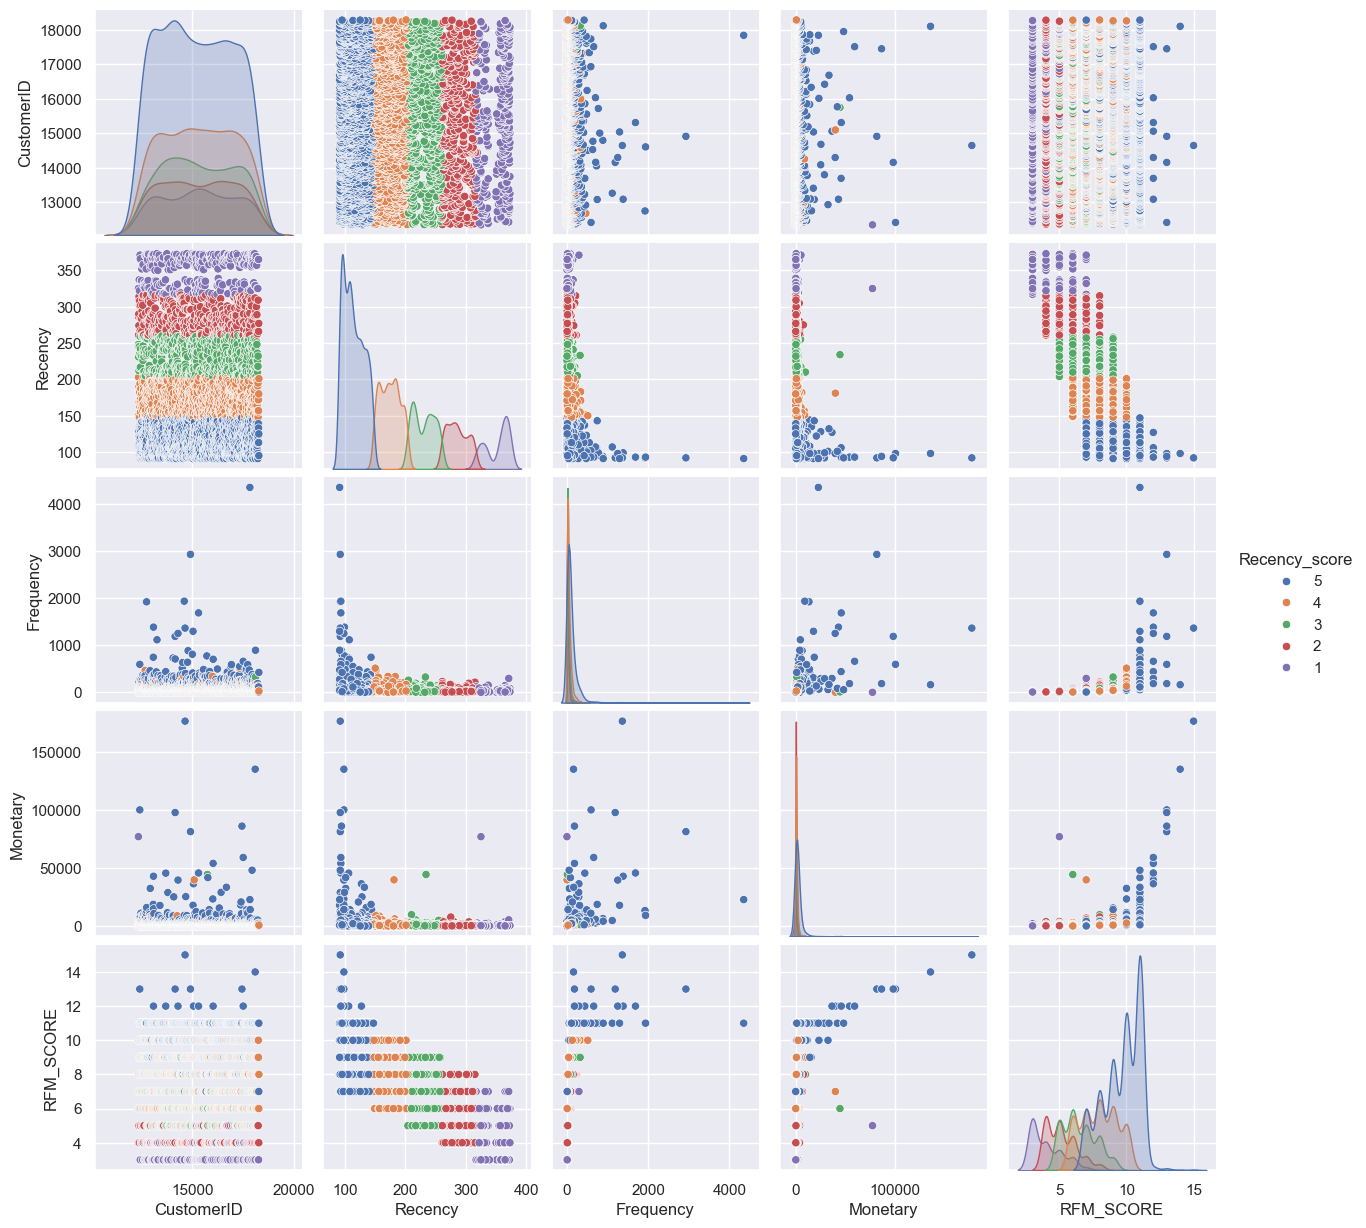

In [55]:
import seaborn as sns

sns.pairplot(rfm,hue="Recency_score")

In [56]:
# importing required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [57]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_score,Monetary_score,Frequency_score,RFM_SCORE
0,12346.0,325,1,77183.60,1,3,1,5
1,12347.0,129,123,2780.66,5,1,5,11
2,12348.0,248,28,1487.24,3,1,3,7
3,12350.0,309,17,334.40,2,1,2,5
4,12352.0,261,38,1561.81,2,1,3,6


In [58]:
rfm.dtypes

CustomerID          float64
Recency               int64
Frequency             int64
Monetary            float64
Recency_score      category
Monetary_score     category
Frequency_score    category
RFM_SCORE             int64
dtype: object

In [59]:
# assigning the required independent feature variables of RFM dataframe to X_rfm variable
X_rfm = rfm[['Recency_score', 'Frequency_score', 'Monetary_score', 'RFM_SCORE']]

In [60]:
# standardizing the data with StandardScaler
std_scaler = StandardScaler()
X_rfm = std_scaler.fit_transform(X_rfm)

In [61]:
# building k-means clustering model and by elbow curve method finding the optimal cluster value

list_wcss = [] # empty list to store Within Cluster Sum of Square values

k = range(1,11)

for i in k:
    
    kmeans = KMeans(n_clusters= i, random_state= 42) # building k-means clustering model 
    kmeans.fit(X_rfm) # fitting data into model
    
    list_wcss.append(kmeans.inertia_) # appending WCSS value to list_wcss



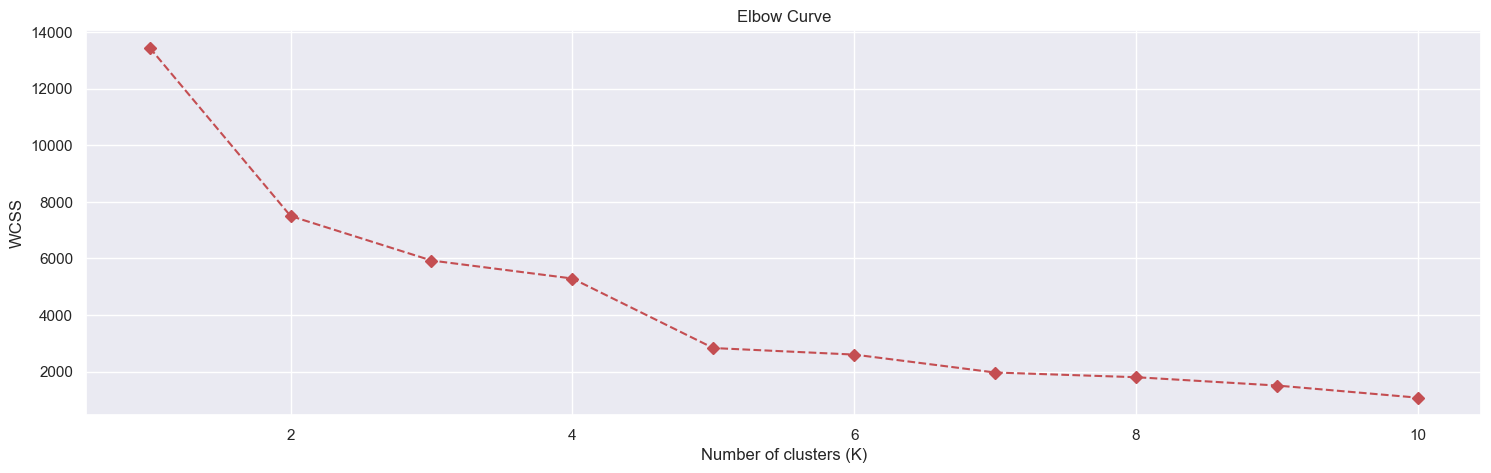

In [62]:
# ploting wcss against k to find optimal k value
plt.plot(k, list_wcss, 'rD--')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()

In [63]:
# segmenting each customer into different segments based on their RFM scores

rfm['Seg_Num'] = pd.cut(rfm['RFM_SCORE'], bins= [0, 6, 10, 18], 
                               labels= [3,2,1]) # getting Segment_Number for each customer

rfm['Segment_Label'] = pd.cut(rfm['RFM_SCORE'], bins= [0, 6, 10, 18], 
                              labels= ['Basic Customer', 'Standard Customer',
                                       'Prime Customer']) # getting Segment_Label for each customer

rfm.head()


,CustomerID,Recency,Frequency,Monetary,Recency_score,Monetary_score,Frequency_score,RFM_SCORE,Seg_Num,Segment_Label
0,12346.0,325,1,77183.60,1,3,1,5,3,Basic Customer
1,12347.0,129,123,2780.66,5,1,5,11,1,Prime Customer
2,12348.0,248,28,1487.24,3,1,3,7,2,Standard Customer
3,12350.0,309,17,334.40,2,1,2,5,3,Basic Customer
4,12352.0,261,38,1561.81,2,1,3,6,3,Basic Customer


In [64]:
# understanding the different segment of customers with median value
rfm.groupby('Segment_Label')[['Recency', 'Frequency', 'Monetary']].median().round().reset_index()



/var/folders/t3/v4nr3hg96mnglt3j6t387ytr0000gn/T/ipykernel_37492/868431041.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm.groupby('Segment_Label')[['Recency', 'Frequency', 'Monetary']].median().round().reset_index()


,Segment_Label,Recency,Frequency,Monetary
0,Basic Customer,275.0,12.0,228.0
1,Standard Customer,144.0,39.0,676.0
2,Prime Customer,106.0,166.0,2727.0


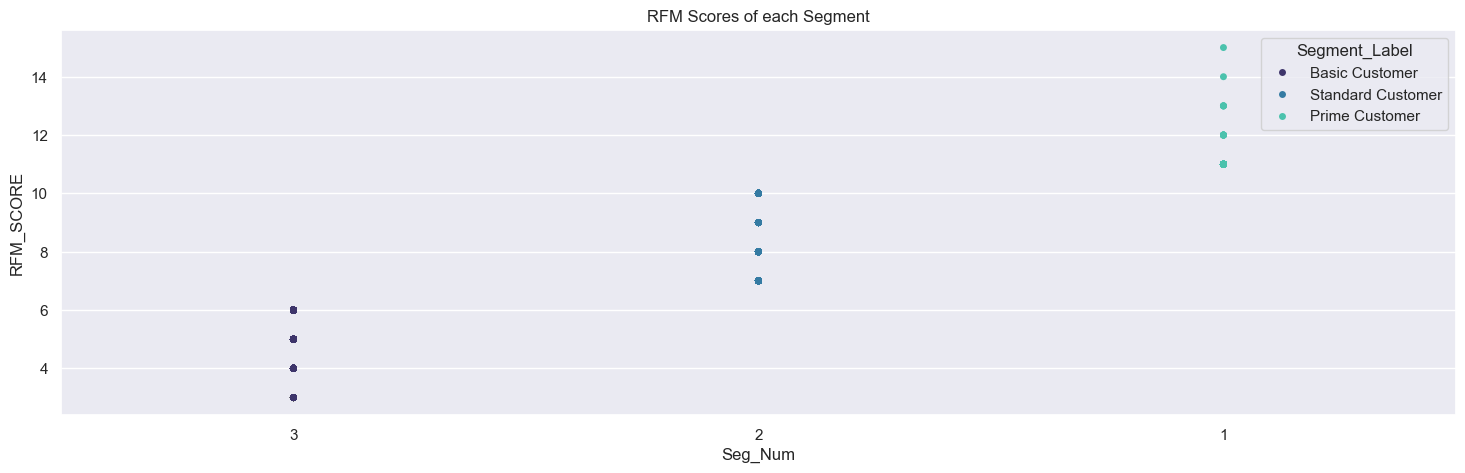

In [65]:
# visualizing the RFM Scores of different segment of customers using strip plot
sns.stripplot(x= 'Seg_Num', y= 'RFM_SCORE', data= rfm, hue= 'Segment_Label', palette= 'mako', jitter=False)
plt.title('RFM Scores of each Segment')
plt.show()

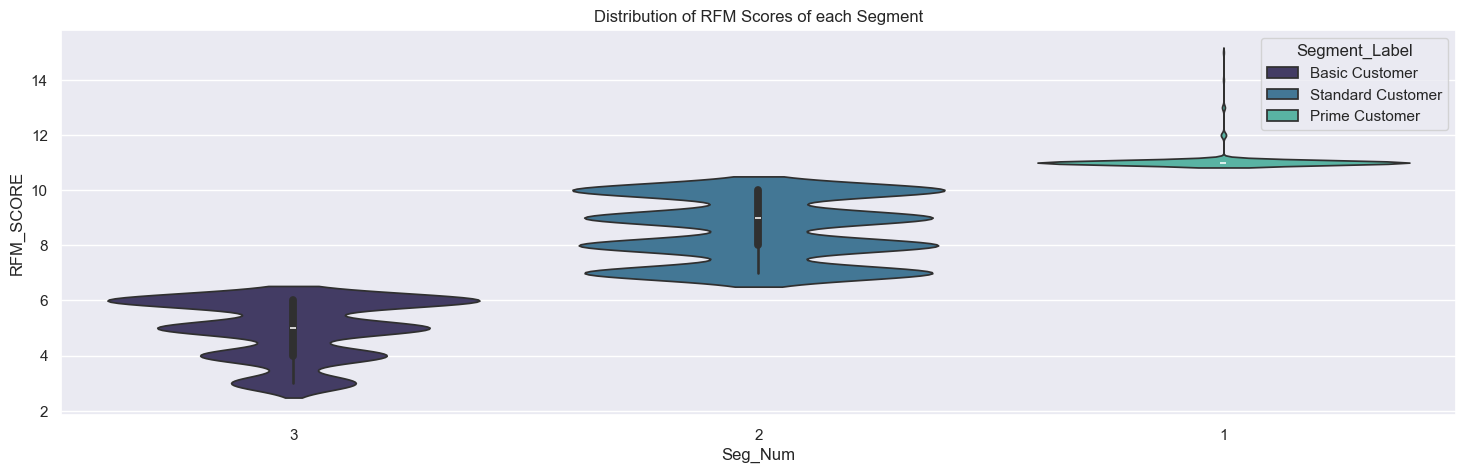

In [66]:
# visualizing the distribution of different segment of customers with their RFM score using violin plot
sns.violinplot(x= 'Seg_Num', y= 'RFM_SCORE', data= rfm, hue= 'Segment_Label', palette= 'mako')
plt.title('Distribution of RFM Scores of each Segment')
plt.show()

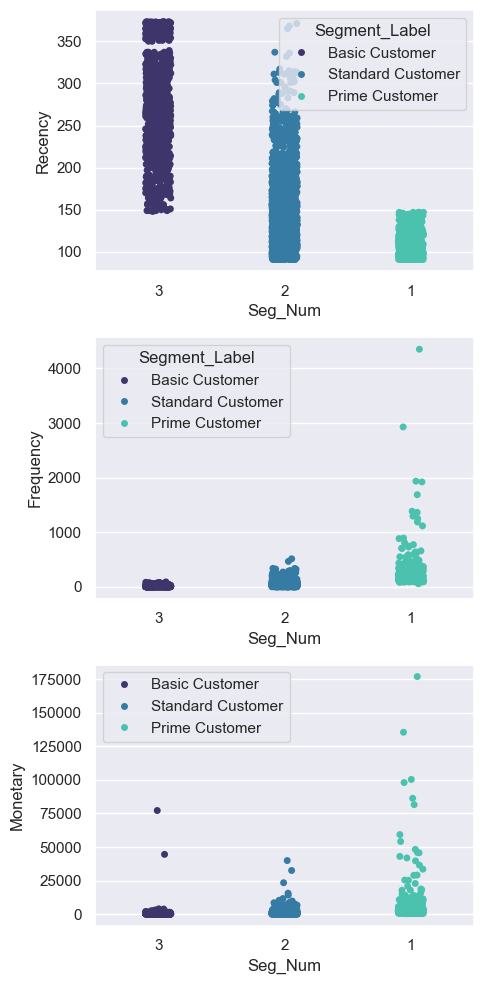

In [67]:
# visualizing the different segment of customers and thier recency, frequency and monetary values using strip plot
fig, axis = plt.subplots(3,1, figsize= (5,10))

for i,feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.stripplot(x= 'Seg_Num', y= feature, data= rfm, hue= 'Segment_Label', palette= 'mako', ax= axis[i])

plt.legend()
plt.tight_layout()
plt.show()

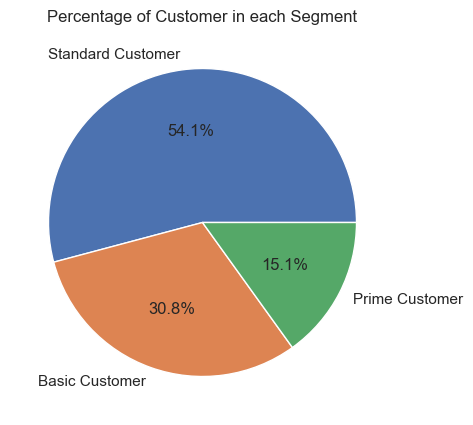

In [68]:
# knowing the percentage of each segment of customers using pie chart
segment_count = rfm['Segment_Label'].value_counts()

plt.pie(segment_count.values, labels= segment_count.index, autopct='%1.1f%%')
plt.title('Percentage of Customer in each Segment')
plt.show()

CHURN ANALYSIS

In [69]:
# taking the second part of data that have only last 3 months of transaction

df_part2 = df.copy() # creating copy
df_part2.set_index('InvoiceDate', inplace= True) # setting Date as index

df_part2 = df_part2.loc['2011-09-01 12:50:00':] # slicing the data
df_part2.reset_index(inplace= True) # resetting index

In [70]:
# viewing the data of df_part2
df_part2.head()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice
0,2011-09-01 12:50:00,565139,21086,SET/6 RED SPOTTY PAPER CUPS,216,0.53,16422.0,United Kingdom,114.48
1,2011-09-01 12:50:00,565139,22083,PAPER CHAIN KIT RETROSPOT,40,2.55,16422.0,United Kingdom,102.00
2,2011-09-01 12:50:00,565139,22090,PAPER BUNTING RETROSPOT,40,2.55,16422.0,United Kingdom,102.00
3,2011-09-01 12:50:00,565139,47590B,PINK HAPPY BIRTHDAY BUNTING,50,4.65,16422.0,United Kingdom,232.50
4,2011-09-01 13:40:00,565141,21523,DOORMAT FANCY FONT HOME SWEET HOME,1,8.25,17841.0,United Kingdom,8.25


In [71]:
df_part2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166988 entries, 0 to 166987
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  166988 non-null  datetime64[ns]
 1   InvoiceNo    166988 non-null  object        
 2   StockCode    166988 non-null  object        
 3   Description  166988 non-null  object        
 4   Quantity     166988 non-null  int64         
 5   UnitPrice    166988 non-null  float64       
 6   CustomerID   166988 non-null  object        
 7   Country      166988 non-null  object        
 8   TotalPrice   166988 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 11.5+ MB


In [72]:
# knowing the number of customers in df_part2
df_part2['CustomerID'].nunique()

2970

In [73]:
# knowing the number of customers in df_part2
df_part1['CustomerID'].nunique()

3363

In [74]:
# getting the number of customers in part1 and part2
part1_customer = df_part1['CustomerID'].sort_values().unique()
part2_customer = df_part2['CustomerID'].sort_values().unique()

In [75]:
# finding how many new customers in part2

New_customers = [] # empty list to store new customers ID

for i in part2_customer:
    if i in part1_customer: # checking customer of part2 data in part1 data
        pass
    else:
        New_customers.append(i) # else appending customer ID to New_customers
        
print(f'Total Number of New Customers: {len(New_customers)}')

Total Number of New Customers: 974


In [76]:
# finding how many old customers made transaction in last three months

R_next_3months = [] # empty list to store customer ID

for i in part1_customer:
    if i in part2_customer: # checking customer of part1 data in part2 data 
        R_next_3months.append('Yes') # if true append Yes

    else:
        R_next_3months.append('No') # else append No


# R_next_3months listesi oluşturuluyor
#R_next_3months = ['Yes' if customer_id in part2_customer else 'No' for customer_id in rfm.index]

In [77]:
len(R_next_3months)

3363

In [78]:
len(rfm)

3363

In [79]:
rfm['R_Next_3Months'] =  R_next_3months # adding the new feature variable

In [80]:
# viewing RFM dataframe
rfm.head(15)

,CustomerID,Recency,Frequency,Monetary,Recency_score,Monetary_score,Frequency_score,RFM_SCORE,Seg_Num,Segment_Label,R_Next_3Months
0,12346.0,325,1,77183.60,1,3,1,5,3,Basic Customer,No
1,12347.0,129,123,2780.66,5,1,5,11,1,Prime Customer,Yes
2,12348.0,248,28,1487.24,3,1,3,7,2,Standard Customer,Yes
3,12350.0,309,17,334.40,2,1,2,5,3,Basic Customer,No
4,12352.0,261,38,1561.81,2,1,3,6,3,Basic Customer,Yes
5,12353.0,203,4,89.00,4,1,1,6,3,Basic Customer,No
6,12354.0,231,58,1079.40,3,1,4,8,2,Standard Customer,No
7,12355.0,213,13,459.40,3,1,2,6,3,Basic Customer,No
8,12356.0,245,57,2753.08,3,1,4,8,2,Standard Customer,Yes
9,12358.0,150,12,484.86,4,1,1,6,3,Basic Customer,Yes


In [81]:
rfm['R_Next_3Months'].isnull().value_counts()

R_Next_3Months
False    3363
Name: count, dtype: int64

In [82]:
rfm['R_Next_3Months'].value_counts()

R_Next_3Months
Yes    1996
No     1367
Name: count, dtype: int64

In [83]:
# finding whether the customer is churned or not based on conditions

Churn = [] # empty list to store the status of churn of customer

for i,j in enumerate(rfm['CustomerID']):
    
    if rfm['Recency'][i] <= 90 and rfm['R_Next_3Months'][i] == 'Yes': 
        Churn.append('No')
        
    elif rfm['Recency'][i] <= 90 and rfm['R_Next_3Months'][i] == 'No':
        
        if rfm['Frequency'][i] <= 15:
            Churn.append('High Risk')
            
        else:
            Churn.append('Low Risk')
            
    elif rfm['Recency'][i] > 90 and rfm['R_Next_3Months'][i] == 'Yes':
        
        if rfm['Frequency'][i] > 15:
            Churn.append('No')
            
        else:
            Churn.append('Low Risk')
            
    elif rfm['Recency'][i] > 90 and rfm['R_Next_3Months'][i] == 'No':
        Churn.append('Yes')
        
rfm['Churn'] = Churn # adding the new feature variable churn

In [84]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_score,Monetary_score,Frequency_score,RFM_SCORE,Seg_Num,Segment_Label,R_Next_3Months,Churn
0,12346.0,325,1,77183.60,1,3,1,5,3,Basic Customer,No,Yes
1,12347.0,129,123,2780.66,5,1,5,11,1,Prime Customer,Yes,No
2,12348.0,248,28,1487.24,3,1,3,7,2,Standard Customer,Yes,No
3,12350.0,309,17,334.40,2,1,2,5,3,Basic Customer,No,Yes
4,12352.0,261,38,1561.81,2,1,3,6,3,Basic Customer,Yes,No


In [85]:
rfm['Churn'].value_counts()

Churn
No          1652
Yes         1367
Low Risk     344
Name: count, dtype: int64

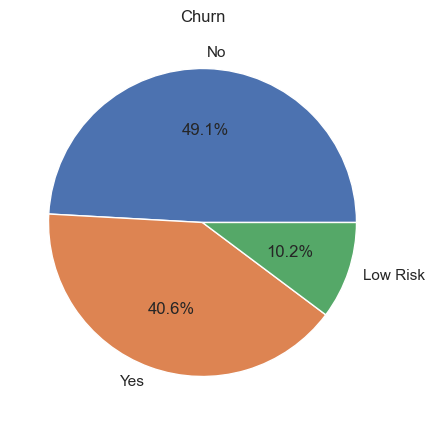

In [86]:
# knowing the percentage of each class in churn using pie chart
churn_count = rfm['Churn'].value_counts()

plt.pie(churn_count.values, labels= churn_count.index, autopct='%1.1f%%')
plt.title('Churn')
plt.show()

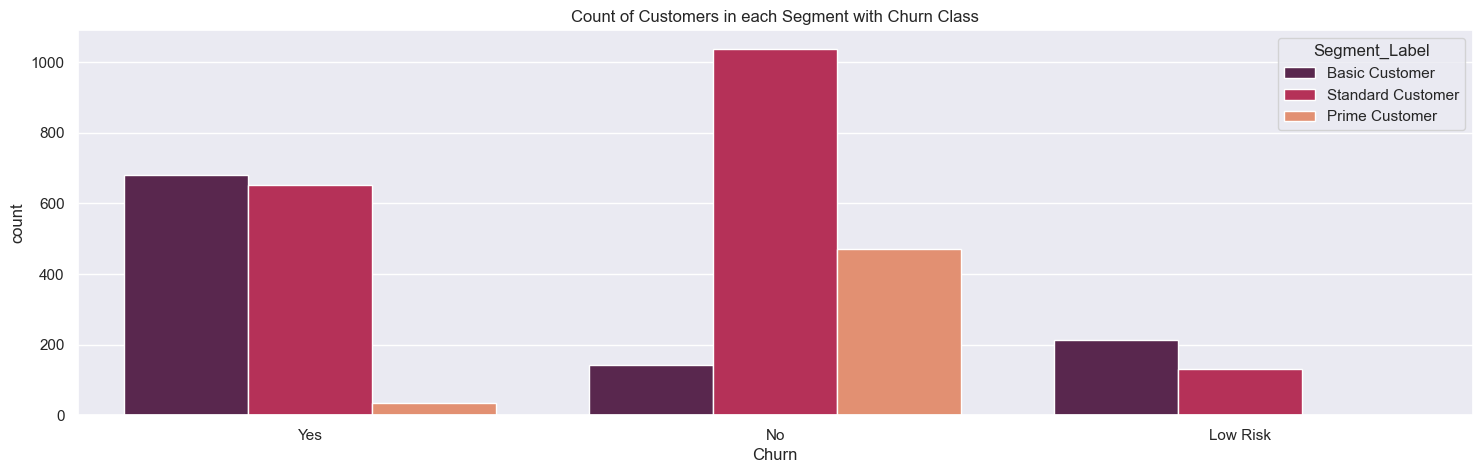

In [87]:
# visualizing different segment of customers and thier churn class
sns.countplot(x= 'Churn', data= rfm, hue= 'Segment_Label', palette= 'rocket')
plt.title('Count of Customers in each Segment with Churn Class')
plt.show()

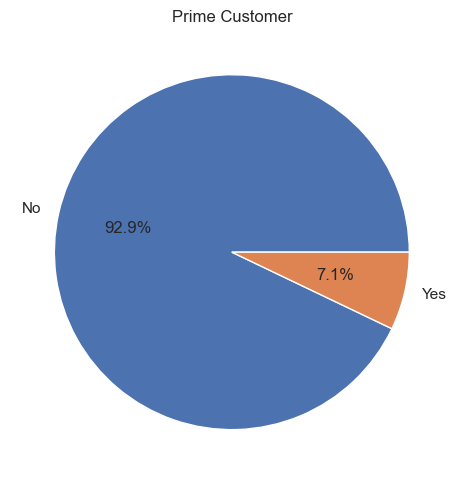

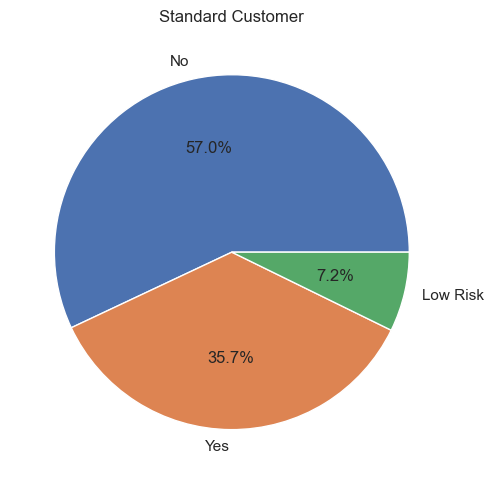

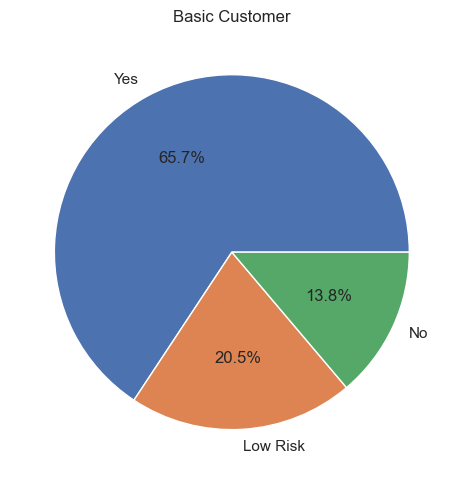

In [88]:
# visualizing and knowing the percentage of churn class for different segment of customers 
segment_list = rfm['Segment_Label'].unique().sort_values(ascending= False)

for i in segment_list:
    segment = rfm[['Segment_Label','Churn']][rfm.Segment_Label == i]
    segment_churn = segment.value_counts().to_frame().reset_index().rename(columns= {0:'count'})
    
    plt.pie(x= segment_churn['count'], labels= segment_churn['Churn'], autopct= '%.1f%%')
    plt.title(i)
    plt.tight_layout()
    plt.show()

In [89]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_score,Monetary_score,Frequency_score,RFM_SCORE,Seg_Num,Segment_Label,R_Next_3Months,Churn
0,12346.0,325,1,77183.60,1,3,1,5,3,Basic Customer,No,Yes
1,12347.0,129,123,2780.66,5,1,5,11,1,Prime Customer,Yes,No
2,12348.0,248,28,1487.24,3,1,3,7,2,Standard Customer,Yes,No
3,12350.0,309,17,334.40,2,1,2,5,3,Basic Customer,No,Yes
4,12352.0,261,38,1561.81,2,1,3,6,3,Basic Customer,Yes,No


In [90]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3363 entries, 0 to 3362
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerID       3363 non-null   float64 
 1   Recency          3363 non-null   int64   
 2   Frequency        3363 non-null   int64   
 3   Monetary         3363 non-null   float64 
 4   Recency_score    3363 non-null   category
 5   Monetary_score   3363 non-null   category
 6   Frequency_score  3363 non-null   category
 7   RFM_SCORE        3363 non-null   int64   
 8   Seg_Num          3363 non-null   category
 9   Segment_Label    3363 non-null   category
 10  R_Next_3Months   3363 non-null   object  
 11  Churn            3363 non-null   object  
dtypes: category(5), float64(2), int64(3), object(2)
memory usage: 201.3+ KB


In [91]:
# converting the datatype of categorical feature from int to object
rfm[['CustomerID', 'Seg_Num', 'Segment_Label']] = rfm[['CustomerID', 'Seg_Num', 'Segment_Label']].astype(object)

In [92]:
# converting the datatype of categorical feature from int to object
rfm[['Recency_score', 'Monetary_score', 'Frequency_score']] = rfm[['Recency_score', 'Monetary_score', 'Frequency_score']].astype(float)

In [93]:
rfm.dtypes

CustomerID          object
Recency              int64
Frequency            int64
Monetary           float64
Recency_score      float64
Monetary_score     float64
Frequency_score    float64
RFM_SCORE            int64
Seg_Num             object
Segment_Label       object
R_Next_3Months      object
Churn               object
dtype: object

In [94]:
# creating correlation matrix for the numeric feature variables
corr = rfm[['Recency', 'Frequency', 'Monetary', 'Recency_score', 'Monetary_score', 'Frequency_score', 'RFM_SCORE']].corr()
corr

,Recency,Frequency,Monetary,Recency_score,Monetary_score,Frequency_score,RFM_SCORE
Recency,1.000000,-0.256147,-0.160875,-0.977173,-0.052049,-0.432627,-0.824694
Frequency,-0.256147,1.000000,0.456757,0.234977,0.319276,0.468453,0.436423
Monetary,-0.160875,0.456757,1.000000,0.142606,0.926909,0.222224,0.267696
Recency_score,-0.977173,0.234977,0.142606,1.000000,0.039649,0.423808,0.831721
Monetary_score,-0.052049,0.319276,0.926909,0.039649,1.000000,0.062037,0.115594
Frequency_score,-0.432627,0.468453,0.222224,0.423808,0.062037,1.000000,0.852872
RFM_SCORE,-0.824694,0.436423,0.267696,0.831721,0.115594,0.852872,1.000000


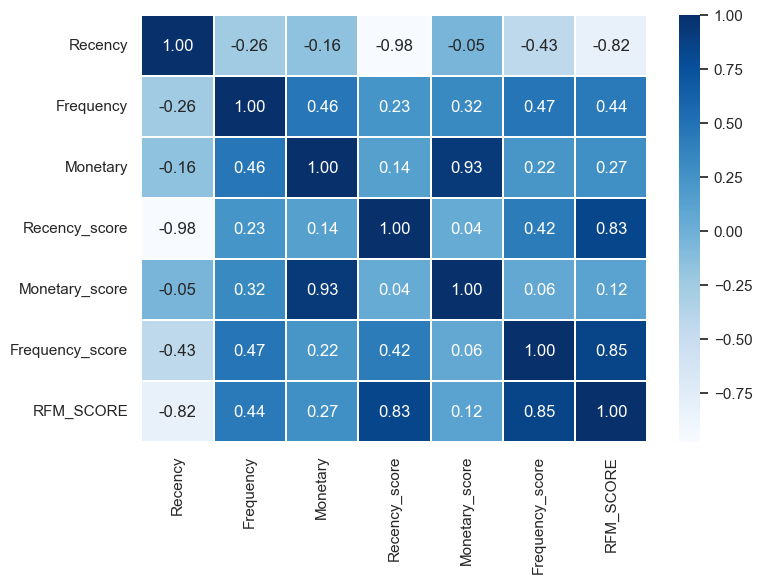

In [95]:
# visualizing the correlation between numeric feature variables using heat map
plt.figure(figsize= (8,6))
sns.heatmap(data= corr, fmt= '.2f', linewidths= 0.2, linecolor= 'white', cmap= 'Blues', annot= True)
plt.tight_layout()
plt.show()

In [96]:
# getting the variance in each features
#rfm.var()

In [97]:
# dropping unwanted and multicollinearity feature variables
df_segment = rfm.copy() # copy of RFM dataframe
df_segment.drop(['CustomerID', 'Recency_score', 'Frequency_score', 'Monetary_score', 'Seg_Num'], axis= 1, inplace= True) # dropping
df_segment.head()

,Recency,Frequency,Monetary,RFM_SCORE,Segment_Label,R_Next_3Months,Churn
0,325,1,77183.60,5,Basic Customer,No,Yes
1,129,123,2780.66,11,Prime Customer,Yes,No
2,248,28,1487.24,7,Standard Customer,Yes,No
3,309,17,334.40,5,Basic Customer,No,Yes
4,261,38,1561.81,6,Basic Customer,Yes,No


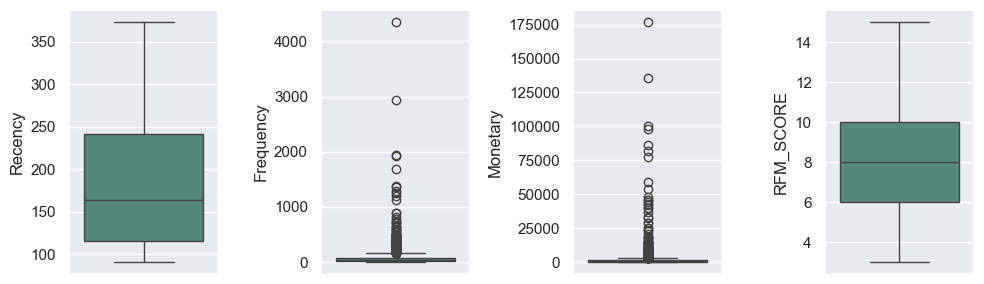

In [98]:
# visualizing and getting know whether independent feature variables having outlier using box plot
num_features = df_segment.select_dtypes(exclude= 'object').columns

fig, axis = plt.subplots(1,4,figsize=(10,3))
axis = axis.flatten()

for i,feature in enumerate(num_features):
    sns.boxplot(y= feature, data= df_segment, ax= axis[i], color= '#4c9085')

plt.tight_layout()
plt.show()

In [99]:
# getting the feature variables having outliers
outliers_features = ['Frequency', 'Monetary']

In [100]:
# removing outliers using zscore 
from scipy import stats
zscore_frequency = np.abs(stats.zscore(df_segment['Frequency'])) # calculating Z-score for frequency
zscore_monetary = np.abs(stats.zscore(df_segment['Monetary'])) # calculating Z-score for monetary

threshold = 3 # setting threshold value

outliers_frequency = list(np.where(zscore_frequency>threshold)[0]) # getting outliers index in frequency
outliers_monetary = list(np.where(zscore_monetary>threshold)[0]) # getting outliers index in monetary

outliers_indices = list(set(outliers_frequency + outliers_monetary)) # creating a set for getting unique index of outliers
outliers_indices.sort() # sorting the list

df_segment = df_segment.drop(df_segment.index[outliers_indices]) # dropping outlier records

In [101]:
print(df_segment)

      Recency  Frequency  Monetary  RFM_SCORE      Segment_Label  \
1         129        123   2780.66         11     Prime Customer   
2         248         28   1487.24          7  Standard Customer   
3         309         17    334.40          5     Basic Customer   
4         261         38   1561.81          6     Basic Customer   
5         203          4     89.00          6     Basic Customer   
...       ...        ...       ...        ...                ...   
3358      277         10    180.60          4     Basic Customer   
3359      180          7     80.82          6     Basic Customer   
3360      125          7    100.21          7  Standard Customer   
3361       95        424   1086.83         11     Prime Customer   
3362      201         29    765.28          8  Standard Customer   

     R_Next_3Months     Churn  
1               Yes        No  
2               Yes        No  
3                No       Yes  
4               Yes        No  
5                No    

In [102]:
# encoding categorical variable using Label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_segment['R_Next_3Months'] = labelencoder.fit_transform(df_segment['R_Next_3Months'])

In [103]:
df_segment.head()

,Recency,Frequency,Monetary,RFM_SCORE,Segment_Label,R_Next_3Months,Churn
1,129,123,2780.66,11,Prime Customer,1,No
2,248,28,1487.24,7,Standard Customer,1,No
3,309,17,334.40,5,Basic Customer,0,Yes
4,261,38,1561.81,6,Basic Customer,1,No
5,203,4,89.00,6,Basic Customer,0,Yes


In [104]:
df_segment['Segment_Label'] = labelencoder.fit_transform(df_segment['Segment_Label'])

In [105]:
df_segment.head()

,Recency,Frequency,Monetary,RFM_SCORE,Segment_Label,R_Next_3Months,Churn
1,129,123,2780.66,11,1,1,No
2,248,28,1487.24,7,2,1,No
3,309,17,334.40,5,0,0,Yes
4,261,38,1561.81,6,0,1,No
5,203,4,89.00,6,0,0,Yes


In [106]:
df_segment['Churn'] = labelencoder.fit_transform(df_segment['Churn'])

In [107]:
df_segment.head()

,Recency,Frequency,Monetary,RFM_SCORE,Segment_Label,R_Next_3Months,Churn
1,129,123,2780.66,11,1,1,1
2,248,28,1487.24,7,2,1,1
3,309,17,334.40,5,0,0,2
4,261,38,1561.81,6,0,1,1
5,203,4,89.00,6,0,0,2


In [108]:
# assigning variables for independent and dependent feature variables

X = df_segment.drop(['Churn'], axis= 1) # independent feature variables
y = df_segment[['Churn']] # dependent feature variables

In [109]:
# standardization of independent variables
'''
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(X)
'''

'\nfrom sklearn.preprocessing import StandardScaler\nstd = StandardScaler()\nX = std.fit_transform(X)\n'

In [110]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [111]:
# Replacing the 0 values with mean
'''
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = 0, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)
'''


"\nfrom sklearn.impute import SimpleImputer\n\nimputer = SimpleImputer(missing_values = 0, strategy='mean')\n\nX_train = imputer.fit_transform(X_train)\nX_test = imputer.fit_transform(X_test)\n"

In [112]:
# Lets see the shape of our train and test datasets

print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(2321, 6), y:(2321, 1)
Shape test set: X:(995, 6), y:(995, 1)


In [113]:
# Modeling Libraries
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

In [114]:
def evaluate_model(models):
    """
    Takes a list of models and returns chart of cross validation scores using mean accuracy
    """
    
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models:
        result.append(cross_val_score(estimator=model, X=X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=1))  # n_jobs=1

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans": cv_means,
        "CrossValerrors": cv_std,
        "Models": [
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"
        ]
    })

    # Generate chart
    bar = sns.barplot(x="CrossValMeans", y="Models", data=result_df, orient="h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/uti

,CrossValMeans,CrossValerrors,Models
0,0.984921,0.005187,LogisticRegression
1,1.000000,0.000000,DecisionTreeClassifier
2,1.000000,0.000000,AdaBoostClassifier
3,0.654471,0.029191,SVC
4,1.000000,0.000000,RandomForestClassifier
5,1.000000,0.000000,GradientBoostingClassifier
6,0.624297,0.024177,KNeighborsClassifier


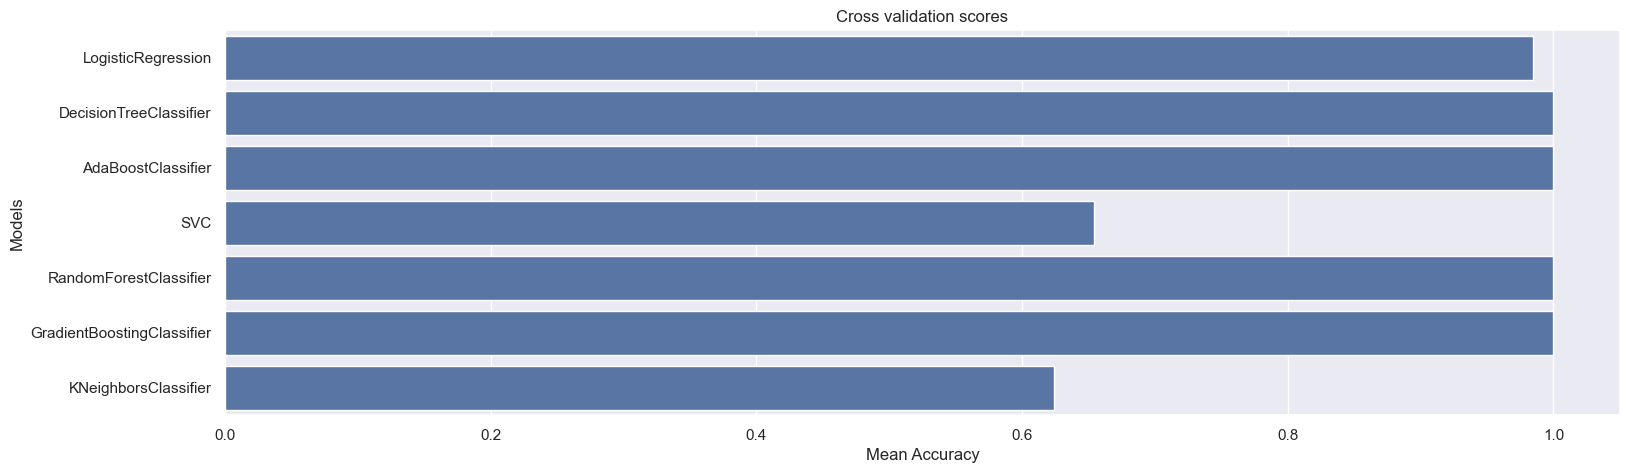

In [115]:
# Modeling step Test differents algorithms 
random_state = 42
models = [
    LogisticRegression(random_state = random_state, solver='liblinear'),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
]
evaluate_model(models)

In [116]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
def analyze_grid_result(grid_result):

    # Best parameters and accuracy
    print("Tuned hyperparameters: (best parameters) ", grid_result.best_params_)
    print("Accuracy :", grid_result.best_score_)
    
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_result.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    y_true, y_pred = y_test, grid_result.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

In [117]:
# Define models and parameters for LogisticRegression
model = LogisticRegression(solver='liblinear')
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# Define grid search
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = StratifiedKFold(n_splits = 50, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv, scoring = 'accuracy', error_score = 0)
logi_result = grid_search.fit(X_train, y_train)
# Logistic Regression Hyperparameter Result
analyze_grid_result(logi_result)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/uti

Tuned hyperparameters: (best parameters)  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9995744680851064
1.000 (+/-0.006) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.992 (+/-0.031) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
1.000 (+/-0.006) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.992 (+/-0.032) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.999 (+/-0.018) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.987 (+/-0.036) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.989 (+/-0.036) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.964 (+/-0.054) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.956 (+/-0.056) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.900 (+/-0.072) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1   

In [120]:
# Initializing the model with the best parameters

model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
model = model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
# Model Prediction and Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.9618090452261306
[[ 64   0   0]
 [ 36 491   2]
 [  0   0 402]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        64
           1       1.00      0.93      0.96       529
           2       1.00      1.00      1.00       402

    accuracy                           0.96       995
   macro avg       0.88      0.98      0.91       995
weighted avg       0.97      0.96      0.97       995

